# 🧬 Clasificación de Cáncer de Mama

## Modelado supervisado – Breast Cancer Wisconsin (Diagnostic) Dataset - Kaggle

---

### 📌 Autor:
**Grupo 3:**
* **Camilo Alberto Dueñas Pupo**
* **Estefany Luna Perez**
* **Sergio David Miranda Bautista**
* **Jonathan Cortés Isaza**


### 🏫 Institución:
**Universidad EAN**

### 📅 Fecha:
**Mayo 2025**

---

### 🎯 Objetivo:
Clasificar tumores como benignos o malignos a partir de características obtenidas de imágenes digitalizadas de aspiraciones con aguja fina de masas mamarias. Esta es una tarea de clasificación binaria (la variable objetivo es `diagnosis`, con valores `B` para benigno y `M` para maligno).

---

### 🛠️ Herramientas:

- **Python**
- **Pandas**, **NumPy**
- **Scikit-learn**
- **Seaborn**, **Matplotlib**
- **Statsmodels**
- **Google Colab**

---

### 📂 Dataset utilizado:

[Breast Cancer Wisconsin (Diagnostic) Data Set – Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data)


#Presentación del dataset

##📑 Descripción de Variables – Breast Cancer Wisconsin (Diagnostic) Dataset

| Variable                  | Tipo            | Descripción |
|---------------------------|------------------|-------------|
| `id`                      | Categórica/ID    | Identificador único del caso. |
| `diagnosis`               | Categórica       | Diagnóstico del tumor: `M` (Maligno) o `B` (Benigno). Es la variable objetivo. |
| `radius_mean`             | Numérica         | Promedio del radio (distancia desde el centro hasta el borde) del tumor. |
| `texture_mean`            | Numérica         | Promedio de la variación de la intensidad en la imagen. |
| `perimeter_mean`          | Numérica         | Promedio del perímetro del tumor. |
| `area_mean`               | Numérica         | Promedio del área del tumor. |
| `smoothness_mean`         | Numérica         | Promedio de la suavidad del contorno (valores más bajos indican contornos más abruptos). |
| `compactness_mean`        | Numérica         | Promedio de compacidad (relación del perímetro al área). |
| `concavity_mean`          | Numérica         | Promedio del grado de concavidad del contorno (cuánto se hunde hacia adentro). |
| `concave points_mean`     | Numérica         | Promedio de puntos cóncavos en el contorno. |
| `symmetry_mean`           | Numérica         | Promedio de simetría del tumor. |
| `fractal_dimension_mean`  | Numérica         | Promedio de la dimensión fractal (complejidad del borde). |
| `radius_se`               | Numérica         | Error estándar del radio. |
| `texture_se`              | Numérica         | Error estándar de la textura. |
| `perimeter_se`            | Numérica         | Error estándar del perímetro. |
| `area_se`                 | Numérica         | Error estándar del área. |
| `smoothness_se`           | Numérica         | Error estándar de la suavidad. |
| `compactness_se`          | Numérica         | Error estándar de la compacidad. |
| `concavity_se`            | Numérica         | Error estándar de la concavidad. |
| `concave points_se`       | Numérica         | Error estándar de los puntos cóncavos. |
| `symmetry_se`             | Numérica         | Error estándar de la simetría. |
| `fractal_dimension_se`    | Numérica         | Error estándar de la dimensión fractal. |
| `radius_worst`            | Numérica         | Valor más alto (peor caso) del radio observado. |
| `texture_worst`           | Numérica         | Valor más alto de la textura. |
| `perimeter_worst`         | Numérica         | Valor más alto del perímetro. |
| `area_worst`              | Numérica         | Valor más alto del área. |
| `smoothness_worst`        | Numérica         | Valor más alto de la suavidad. |
| `compactness_worst`       | Numérica         | Valor más alto de la compacidad. |
| `concavity_worst`         | Numérica         | Valor más alto de la concavidad. |
| `concave points_worst`    | Numérica         | Valor más alto de los puntos cóncavos. |
| `symmetry_worst`          | Numérica         | Valor más alto de la simetría. |
| `fractal_dimension_worst` | Numérica         | Valor más alto de la dimensión fractal. |


#Importación de librerías necesarias y Carga de Datos

Manipulación de datos
* Se importan las librerías necesarias para la manipulación y procesamiento de datos.

Visualización
* Estas librerías permiten realizar gráficos y visualizar los datos de manera efectiva.

Preprocesamiento y transformación
* Aquí se importan herramientas para escalar y transformar los datos, así como para manejar valores faltantes.

In [ ]:
# =======================
# CARGA Y MANIPULACIÓN DE DATOS
# =======================
import pandas as pd
import numpy as np

# =======================
# VISUALIZACIÓN
# =======================
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# PREPROCESAMIENTO Y TRANSFORMACIÓN
# =======================
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# =======================
# SELECCIÓN Y REDUCCIÓN DE DIMENSIONES
# =======================
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA

# =======================
# DIVISIÓN Y VALIDACIÓN DEL MODELO
# =======================
from sklearn.model_selection import train_test_split, GridSearchCV

# =======================
# MODELOS DE CLASIFICACIÓN
# =======================
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# =======================
# MÉTRICAS DE CLASIFICACIÓN
# =======================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# =======================
# MODELOS DE CLUSTERING
# =======================
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# =======================
# CONFIGURACIONES GENERALES
# =======================
import warnings
warnings.filterwarnings("ignore")




Carga de Datos

* En esta sección se realiza la carga del dataset desde un archivo CSV. Se especifica la ruta del archivo y luego se lee el archivo utilizando la librería `pandas`. El dataframe resultante se almacena en `df`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -----------------------
# Carga de datos
# -----------------------

# Ruta del archivo
ruta = '/content/drive/MyDrive/# Ciencia de Datos EAN/Machine Learning 1/Proyecto Integrador/BD/data.csv'

# Leer archivo CSV
df = pd.read_csv(ruta)

#Definición de Funciones

Función 1: Inspección del DataFrame

Esta función realiza una inspección básica del DataFrame, proporcionando información clave sobre su estructura, los tipos de datos, valores nulos y duplicados. Está diseñada para ayudar a realizar un análisis preliminar y obtener una visión general de los datos.

La función realiza lo siguiente:

1. **Dimensiones del dataset**: Muestra el número de filas y columnas.
2. **Conteo de columnas por tipo de dato**: Presenta la cantidad de columnas de cada tipo de dato (por ejemplo, enteros, flotantes, objetos).
3. **Resumen de columnas por tipo de dato**: Muestra el número de valores únicos por columna para cada tipo de dato.
4. **Resumen de valores nulos**: Informa sobre las columnas con valores nulos, incluyendo el número y el porcentaje de valores faltantes.
5. **Filas duplicadas**: Informa sobre el número de filas duplicadas en el dataset.

In [ ]:
def inspeccion(df: pd.DataFrame) -> None:
    """
    Función que realiza una inspección básica del DataFrame y proporciona información sobre:
    - Dimensiones del dataset
    - Conteo de columnas por tipo de dato
    - Resumen de columnas por tipo de dato con el número de valores únicos
    - Resumen de valores nulos
    - Filas duplicadas

    Args:
        df (pd.DataFrame): El DataFrame que se desea inspeccionar.

    Returns:
        None
    """

    # Configuración de Pandas para mejorar la presentación de floats
    pd.set_option('display.float_format', '{:,.2f}'.format)

    # Dimensiones del dataset
    print(f"📊 Dimensiones del dataset:")
    print("=" * 100)
    print(f"{df.shape[0]:,} filas y {df.shape[1]:,} columnas")
    print("=" * 100, "\n")

    # Conteo de columnas por tipo de dato
    print("📌 Número de columnas por tipo de dato:")
    print("=" * 100)
    dtype_counts = df.dtypes.value_counts()
    dtype_summary = pd.DataFrame({"Tipo de Dato": dtype_counts.index, "Cantidad de Columnas": dtype_counts.values})
    print(dtype_summary.to_string(index=False))  # Muestra en formato de tabla
    print("=" * 100, "\n")

    # Detalle tipo de dato y valores únicos por columna
    print("🔍 Resumen de columnas por tipo de dato (📊 Cantidad de valores únicos por columna)")
    print("=" * 100)

    dicc_tipo = {}
    for tipo in df.dtypes.unique():
        # Filtrar las columnas por tipo de dato y almacenarlas en el diccionario
        dicc_tipo[tipo] = df.columns[df.dtypes == tipo].tolist()

    # Imprimir las columnas por tipo de dato con salto de columna cada 6 columnas
    for tipo, columnas in dicc_tipo.items():
        print(f"🔹 Tipo: {tipo}")
        print("-" * 100)  # Línea separadora

        # Imprimir columnas en bloques de 6 con el número de valores únicos
        for i in range(0, len(columnas), 6):
            columnas_info = [f"{col} ({df[col].nunique():,})" for col in columnas[i:i + 6]]
            print(f"   {'   '.join(columnas_info)}")  # Imprime hasta 6 columnas por línea

        print("-" * 100, "\n")
    print("=" * 100, "\n")

    # Resumen de valores nulos
    print("⚠️ Valores nulos por columna:")
    print("=" * 100)
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.DataFrame({"Valores Nulos": missing_values, "Porcentaje (%)": missing_percentage})
    missing_data = missing_data[missing_data["Valores Nulos"] > 0].sort_values(by="Valores Nulos", ascending=False)

    if not missing_data.empty:
        print(missing_data.to_string(index=True))
    else:
        print("✅ No hay valores nulos en el dataset.")
    print("=" * 100, "\n")

    # Duplicados en el dataset
    print("🛑 Filas duplicadas en el dataset:")
    print("=" * 100)
    duplicates = df.duplicated().sum()
    duplicate_percentage = (duplicates / len(df)) * 100
    print(f"📊 Número de filas duplicadas: {duplicates} ({duplicate_percentage:.2f}%)")
    print("=" * 100, "\n")

    # Restaurar opciones originales para no afectar otros procesos
    pd.reset_option('display.float_format')

Función 2: Eliminar Variables Correlacionadas con la Variable Objetivo

Esta función elimina las variables que están altamente correlacionadas entre sí en un DataFrame, considerando un umbral de correlación. Además, entre las variables correlacionadas, se selecciona para eliminar la que tiene la correlación más negativa con la variable objetivo.

Parámetros:
1. **df**: DataFrame que contiene las variables, incluyendo la variable objetivo.
2. **target**: Nombre de la columna que es la variable objetivo en el DataFrame. Esta variable no será considerada al evaluar las correlaciones con otras variables.
3. **correlation_threshold**: Umbral de correlación por encima del cual se considerarán las variables para ser eliminadas. El valor predeterminado es 0.9, lo que significa que se eliminarán las variables con una correlación superior al 90%.



In [ ]:
# Definimos la función que eliminará las variables altamente correlacionadas
def remove_highly_correlated_features(df, target, correlation_threshold=0.9):
    # Copiar el DataFrame original para no modificar el DataFrame original
    df_copy = df.copy()

    # Eliminar la variable objetivo del DataFrame para que no se tenga en cuenta en las correlaciones
    df_copy = df_copy.drop(columns=[target], axis=1)

    # Calcular la matriz de correlación entre las columnas del DataFrame (sin la variable objetivo)
    corr_matrix = df_copy.corr()

    # Crear una lista para almacenar las variables que serán eliminadas debido a alta correlación
    to_drop = []
    explanations = []  # Lista para almacenar explicaciones de eliminación

    # Iterar sobre todas las combinaciones posibles de columnas en la matriz de correlación
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Solo considerar las combinaciones de columnas cuya correlación absoluta sea mayor al umbral
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                # Identificar las columnas correlacionadas
                colname = corr_matrix.columns[i]
                othername = corr_matrix.columns[j]

                # Obtener el valor de la correlación entre las columnas
                corr_colname_othername = corr_matrix.iloc[i, j].round(4)

                # Comparar las correlaciones de cada columna con la variable objetivo
                corr_colname_target = df[target].corr(df[colname]).round(4)
                corr_othername_target = df[target].corr(df[othername]).round(4)

                if corr_colname_target < corr_othername_target:
                    # Si la correlación de 'colname' con la variable objetivo es menor, marcar 'colname' para eliminar
                    to_drop.append(colname)
                    explanations.append(f"Se elimina '{colname}' por tener una correlación de {corr_colname_othername} con '{othername}' y menor correlación con la variable objetivo: {corr_colname_target} < {corr_othername_target}.")
                else:
                    # Si la correlación de 'othername' con la variable objetivo es menor, marcar 'othername' para eliminar
                    to_drop.append(othername)
                    explanations.append(f"Se elimina '{othername}' por tener una correlación de {corr_colname_othername} con '{colname}' y menor correlación con la variable objetivo: {corr_othername_target} < {corr_colname_target}.")

    # Imprimir las variables eliminadas junto con su explicación
    if to_drop:
        print("Variables eliminadas debido a alta correlación:")
        for explanation in explanations:
            print(explanation)
    else:
        print("No se eliminaron variables, ya que no se encontraron correlaciones superiores al umbral.")

    # Eliminar las variables identificadas que tienen alta correlación
    df_copy = df_copy.drop(columns=to_drop)

    # Volver a agregar la variable objetivo al DataFrame final
    df_copy[target] = df[target]

    # Retornar el DataFrame modificado con las variables correlacionadas eliminadas
    return df_copy

#Inspección Inicial de Datos

Mostrar las primeras 5 filas del conjunto de datos 'df_train'

En este paso, utilizamos la función `head()` de pandas para obtener las primeras 5 filas del conjunto de datos `df`. Esto es útil para obtener una visión rápida del contenido del DataFrame y verificar si los datos se han cargado correctamente.

In [ ]:
# Mostrar las primeras 5 filas del conjunto de datos 'df_train'
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Eliminar la columna 'id'

En este paso, eliminamos la columna id del DataFrame df. Por ser una columna que no aporta valor para el análisis, siendo un identificador único de caso que no tiene relación con el resto de las variables.

In [ ]:
# Eliminar la columna 'EmployeeNumber' del DataFrame 'df'.
# Se usa el parámetro 'axis=1' para indicar que se debe eliminar una columna (y no una fila).
# El parámetro 'inplace=True' asegura que la eliminación se realice directamente sobre el DataFrame original sin necesidad de asignar el resultado a una nueva variable.
df.drop(['id'], axis=1, inplace=True)

Ejecutar la función 'inspeccion' para analizar y mostrar detalles sobre el DataFrame

En este paso, ejecutamos la función `inspeccion` para obtener un análisis detallado del DataFrame `df`. Esta función proporciona información clave como las dimensiones del DataFrame y el volumen de cada tipo de columna (numérica, categórica, etc.), lo cual es útil para entender la estructura y los tipos de datos con los que estamos trabajando.


In [ ]:
# Ejecutar la función 'inspeccion' para analizar y mostrar detalles sobre el dataframe como Dimensiones, Volumen de tipos de columnas
inspeccion(df)

📊 Dimensiones del dataset:
569 filas y 32 columnas

📌 Número de columnas por tipo de dato:
Tipo de Dato  Cantidad de Columnas
     float64                    31
      object                     1

🔍 Resumen de columnas por tipo de dato (📊 Cantidad de valores únicos por columna)
🔹 Tipo: object
----------------------------------------------------------------------------------------------------
   diagnosis (2)
---------------------------------------------------------------------------------------------------- 

🔹 Tipo: float64
----------------------------------------------------------------------------------------------------
   radius_mean (456)   texture_mean (479)   perimeter_mean (522)   area_mean (539)   smoothness_mean (474)   compactness_mean (537)
   concavity_mean (537)   concave points_mean (542)   symmetry_mean (432)   fractal_dimension_mean (499)   radius_se (540)   texture_se (519)
   perimeter_se (533)   area_se (528)   smoothness_se (547)   compactness_se (541)   concavity

📊 Dimensiones Generales:

- **Número de filas (observaciones):** 569  
- **Número de columnas (variables):** 32  

---

🧮 Tipos de Datos y Distribución:

| Tipo de Dato | Cantidad de Columnas |
|--------------|----------------------|
| `float64`    | 31                   |
| `object`     | 1                    |

- La única columna categórica es `diagnosis`, que representa la variable objetivo del modelo:
  - `M` = Maligno
  - `B` = Benigno
---

### 📌 Resumen de Unicidad de Valores por Columna:

- Las variables numéricas presentan una **alta cantidad de valores únicos**, lo que sugiere buena variabilidad.
- Ejemplos:
  - `radius_mean`: 456 valores únicos
  - `texture_mean`: 479
  - `area_mean`: 539
- Esto sugiere que estas variables pueden ser útiles para distinguir entre clases en tareas de clasificación.

---

### ⚠️ Análisis de Valores Nulos:

| Columna       | Nulos | Porcentaje (%) |
|---------------|-------|----------------|
| `Unnamed: 32` | 569   | 100.00%        |

- La columna `Unnamed: 32` está completamente vacía y debe ser **eliminada**, ya que no aporta valor.
- **Todas las demás columnas no presentan valores nulos**, lo cual es ideal para un análisis limpio y directo sin requerir imputación.

---

### 🧭 Duplicados:

- **Número de filas duplicadas:** 0 (0.00%)

No hay registros duplicados, lo cual es una excelente señal para mantener la integridad de los datos durante el entrenamiento de los modelos.

---

### ✅ Conclusión:

- El dataset se encuentra **en excelente estado para análisis**.
- Se requiere eliminar la columna vacía `Unnamed: 32`.
- La variable objetivo (`diagnosis`) es categórica binaria y apta para tareas de clasificación.
- No hay valores nulos (salvo en una columna irrelevante) ni registros duplicados.

---



Eliminar la columna 'Unnamed: 32'

Al ser una columna vacia o un error de carga del dataframe.

In [ ]:
# Eliminar la columna 'EmployeeNumber' del DataFrame 'df'.
# Se usa el parámetro 'axis=1' para indicar que se debe eliminar una columna (y no una fila).
# El parámetro 'inplace=True' asegura que la eliminación se realice directamente sobre el DataFrame original sin necesidad de asignar el resultado a una nueva variable.
df.drop(['Unnamed: 32'], axis=1, inplace=True)

Análisis Descriptivo de Variables Numéricas

En este paso, se utiliza la función `describe` para realizar un análisis detallado de las variables numéricas en el DataFrame `df`. Esta función calcula diversas métricas estadísticas.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


📈 Análisis Estadístico de las Variables Numéricas

🔹 Tendencias Generales

- Las medias y desviaciones estándar varían ampliamente según la naturaleza de cada variable.
- Algunas variables tienen una **distribución fuertemente sesgada** hacia valores bajos con **valores máximos muy altos**, lo que puede requerir escalado o transformación para modelos sensibles a la escala.

---

📌 Variables destacadas

#### 🧠 Tamaño del tumor (escala amplia)
- `radius_mean`: media = 14.13, máx = 28.11
- `perimeter_mean`: media = 91.97, máx = 188.5
- `area_mean`: media = 654.88, máx = 2501.0

> Estas variables presentan alta variabilidad y grandes valores máximos, lo que sugiere la presencia de tumores mucho más grandes en ciertos casos.

---

🎯 Variables de forma/tamaño en bordes

- `smoothness_mean`: valores entre 0.05 y 0.16 (muy pequeños)
- `compactness_mean` y `concavity_mean`: con máximos de 0.34 y 0.43 respectivamente

> Estas variables tienen valores muy pequeños y podrían necesitar normalización para algoritmos como KNN o redes neuronales.

---
🧬 Variables de textura y complejidad

- `texture_mean`: media = 19.29, máx = 39.28
- `symmetry_mean`: media = 0.18
- `fractal_dimension_mean`: media = 0.062

> La baja magnitud de `fractal_dimension` y su desviación pequeña sugieren que estas características tienen un rango estrecho.

---

📊 Variables "_worst"

Las variables con sufijo `_worst` representan las **peores mediciones registradas** por imagen:

| Variable               | Media     | Máximo   |
|------------------------|-----------|----------|
| `radius_worst`         | 16.27     | 36.04    |
| `perimeter_worst`      | 107.26    | 251.20   |
| `area_worst`           | 880.58    | 4254.00  |
| `concavity_worst`      | 0.27      | 1.25     |
| `compactness_worst`    | 0.25      | 1.05     |

> Estas variables presentan **valores extremos muy altos**, lo que puede indicar **casos altamente anómalos o malignos**. Su rango amplio sugiere que pueden ser muy relevantes para la clasificación.

---
⚖️ Observaciones adicionales:

- Variables como `smoothness_se`, `fractal_dimension_se` y `concave points_se` tienen escalas muy pequeñas.
- Algunas variables como `concavity_mean`, `concave_points_mean`, `compactness_worst`, `concavity_worst`, y `area_worst` muestran **asimetrías positivas importantes**, con valores máximos mucho mayores que sus medianas y 75 percentiles → posible sesgo a derecha.
- Las variables relacionadas con tamaño y área podrían dominar otras si no se normalizan.

---

✅ Recomendaciones para Preprocesamiento

- **Escalado o normalización** de todas las variables numéricas.
- Verificar correlación entre variables (por ejemplo, `radius_mean`, `perimeter_mean`, `area_mean`) ya que podrían aportar información redundante.

---

#Transformación de Datos

Transformación de Variables Categóricas y Objetivo

En este paso se realiza la transformación necesaria para preparar el dataset antes del entrenamiento del modelo. En el caso del dataset **Breast Cancer Wisconsin**, solo existe una variable categórica: la **variable objetivo**, que indica si el tumor es **maligno** o **benigno**.

Proceso Aplicado

1. **Identificación de la Variable Categórica**:

2. **Transformación de la Variable Objetivo**:
   - Se aplica `LabelEncoder` de `sklearn.preprocessing` para convertir las etiquetas `'M'` y `'B'` en valores numéricos (`1` para maligno y `0` para benigno).
   - Esto es necesario para que los algoritmos de aprendizaje automático puedan trabajar con la variable objetivo.

3. **Revisión del Dataset Final**:
   - El conjunto de datos resultante estará completamente compuesto por variables numéricas, lo cual es ideal para la mayoría de los modelos de clasificación.

In [ ]:
# Crear una instancia del codificador
label_encoder = LabelEncoder()

# Aplicar la transformación a la columna 'diagnosis'
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Verificar las clases transformadas
print("Clases codificadas:")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"'{original}' → {encoded}")

# Contar las ocurrencias de cada clase codificada
print("\nFrecuencia de cada clase codificada:")
print(df['diagnosis'].value_counts())



Clases codificadas:
'B' → 0
'M' → 1

Frecuencia de cada clase codificada:
diagnosis
0    357
1    212
Name: count, dtype: int64


Actualmente no se ve necesario el balanceo de cargas por lo cual se decide entrenar el modelo sin balancear y ver cómo se comporta. Si se observa que la clase M es muy mal clasificada o si el rendimiento es deficiente, se podría considerar usar técnicas de balanceo.

#Análisis de Correlaciones y Eliminación de Características Redundantes con Alta Correlación

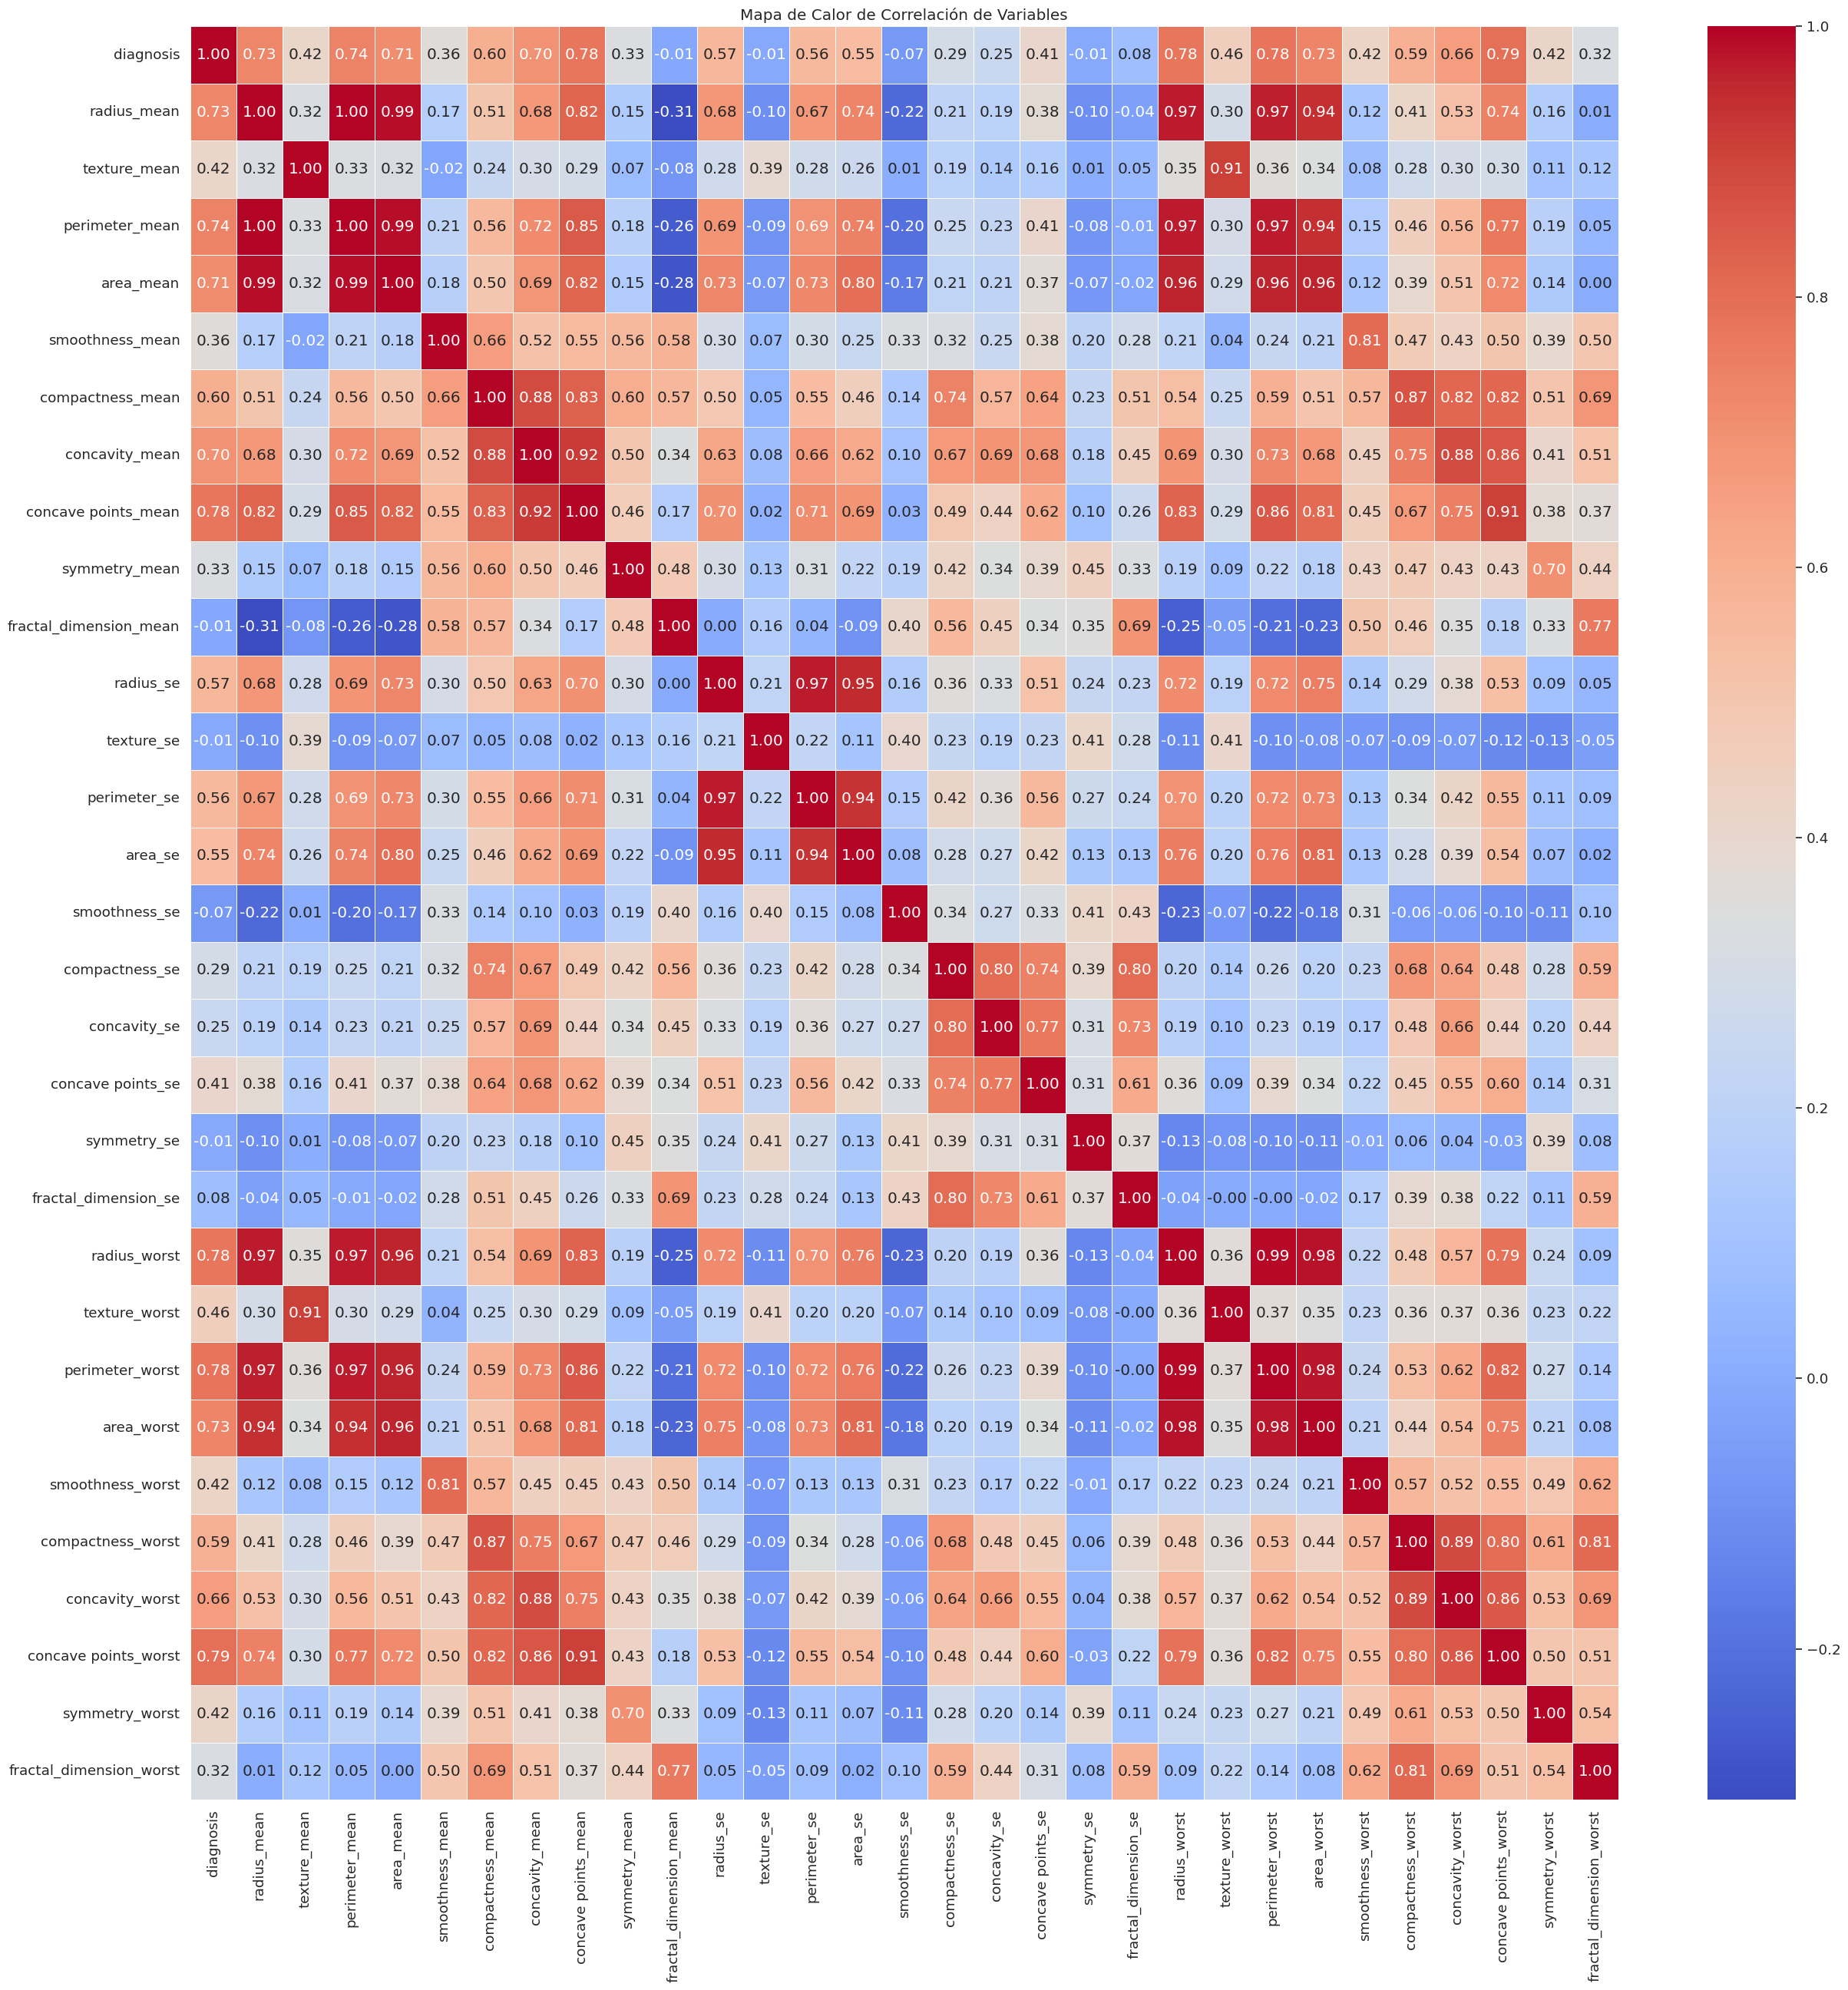

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(30, 30))

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Calor de Correlación de Variables')

# Mostrar el gráfico
plt.show()

Eliminar las variables que están altamente correlacionadas del DataFrame, considerando un umbral de correlación. Además, entre las variables correlacionadas, se selecciona para eliminar la que tiene la correlación más negativa con la variable objetivo.

In [ ]:
# Se llama a la función remove_highly_correlated_features pasando tres parámetros:
# df: El DataFrame original que contiene los datos.
# 'diagnosis': La variable objetivo que no se debe eliminar ni considerar en las correlaciones.
# 0.9: El umbral de correlación, eliminando variables con correlaciones mayores a 0.9 con otras.
df_clean = remove_highly_correlated_features(df, 'diagnosis', 0.9)


Variables eliminadas debido a alta correlación:
Se elimina 'radius_mean' por tener una correlación de 0.9979 con 'perimeter_mean' y menor correlación con la variable objetivo: 0.73 < 0.7426.
Se elimina 'area_mean' por tener una correlación de 0.9874 con 'radius_mean' y menor correlación con la variable objetivo: 0.709 < 0.73.
Se elimina 'area_mean' por tener una correlación de 0.9865 con 'perimeter_mean' y menor correlación con la variable objetivo: 0.709 < 0.7426.
Se elimina 'concavity_mean' por tener una correlación de 0.9214 con 'concave points_mean' y menor correlación con la variable objetivo: 0.6964 < 0.7766.
Se elimina 'perimeter_se' por tener una correlación de 0.9728 con 'radius_se' y menor correlación con la variable objetivo: 0.5561 < 0.5671.
Se elimina 'area_se' por tener una correlación de 0.9518 con 'radius_se' y menor correlación con la variable objetivo: 0.5482 < 0.5671.
Se elimina 'area_se' por tener una correlación de 0.9377 con 'perimeter_se' y menor correlación con 

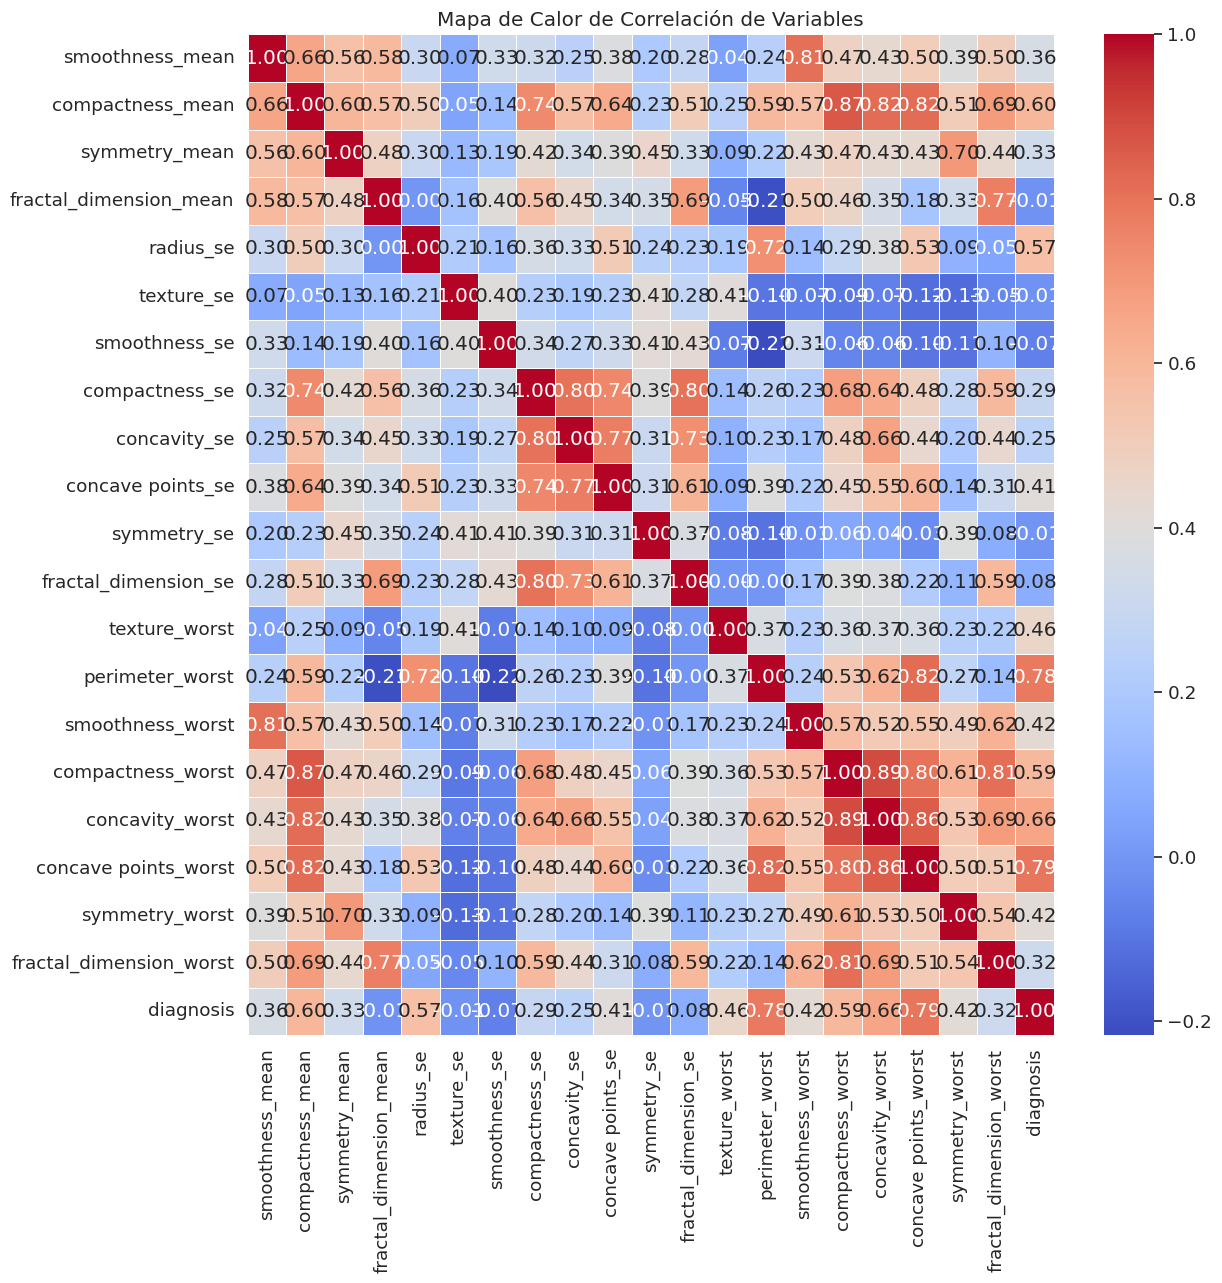

In [ ]:
# Se calcula la matriz de correlación de las variables restantes en df_clean
corr_matrix = df_clean.corr()

# Configuración del tamaño de la figura para el mapa de calor
plt.figure(figsize=(13, 13))

# Generación del mapa de calor usando Seaborn, con anotaciones de las correlaciones
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Calor de Correlación de Variables')

# Mostrar el gráfico
plt.show()


#Escalado de las Variables con `StandardScaler`



Se utiliza el `StandardScaler`, que estandariza las variables a una media de 0 y una desviación estándar de 1.

Explicación del proceso:
1. **Inicialización del `StandardScaler`**: Se crea una instancia de `StandardScaler` de `sklearn`, que realizará el escalado de los datos.
2. **Ajuste y Transformación de los Datos**: Se utiliza `fit_transform()` para ajustar el escalador a los datos y transformarlos de una vez.
3. **Creación del DataFrame Escalado**: Después de la transformación, se crea un nuevo DataFrame con los datos escalados, utilizando las mismas columnas y el índice del DataFrame original.

In [ ]:
# Escalado con StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean.drop('diagnosis', axis=1))

# Crear nuevo DataFrame escalado con los mismos nombres de columnas
df_scaled = pd.DataFrame(scaled_data, columns=df_clean.drop('diagnosis', axis=1).columns, index=df_clean.index)

# Definimos DataFrame de resultados
df_diagnosis= df_clean['diagnosis']

# Agregar la variable objetivo al DataFrame escalado
df_scaled['diagnosis'] = df_diagnosis

In [ ]:
# Verificamos el dataset.
df_scaled.head()

,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,...,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,...,0.907083,-1.359293,2.303601,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,...,-0.099444,-0.369203,1.535126,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,...,0.293559,-0.023974,1.347475,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,...,2.047511,0.133984,-0.249939,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,...,0.499328,-1.466770,1.338539,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


#Análisis de diagnostico a través de la aplicación de modelos no supervisados (KMeans) y reducción de dimensionalidad

##Aplicación de PCA

###Análisis de Componentes Principales (PCA) a elegir por varianza

En este paso, hemos ajustado un modelo PCA al conjunto de datos escalados. El objetivo es analizar la cantidad de varianza explicada por cada componente principal. La varianza explicada acumulada se calcula para determinar cuántos componentes necesitamos para capturar un porcentaje significativo de la varianza total. En el gráfico generado, mostramos la varianza explicada acumulada, destacando con una línea roja el umbral del 95%, que indica cuánta varianza es explicada por los primeros componentes.

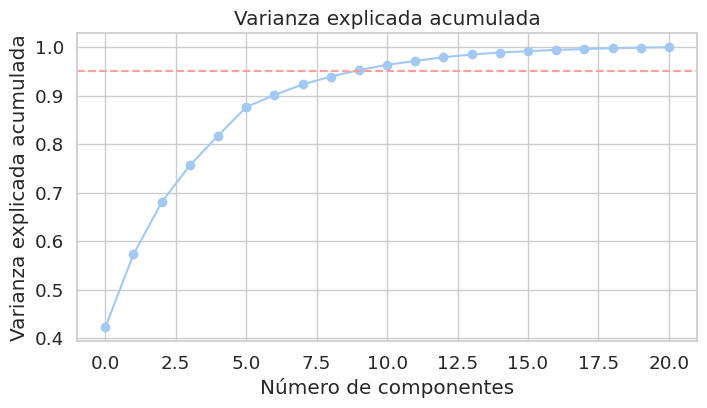

In [ ]:
# Ajustar PCA sin limitar el número de componentes
pca = PCA()
pca.fit(df_scaled)  # datos ya escalados con StandardScaler

# Calcular varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

📊 Análisis de Varianza Explicada Acumulada en PCA

🎯 Objetivo

El propósito de aplicar **Análisis de Componentes Principales (PCA)** es reducir la dimensionalidad del conjunto de datos sin perder información significativa. Para decidir cuántas componentes conservar, analizamos la **varianza explicada acumulada**.

---

📈 Interpretación del Gráfico

A continuación, se muestra el gráfico de la varianza explicada acumulada por el PCA:

- El eje **X** representa el número de componentes principales.
- El eje **Y** representa la proporción acumulada de varianza explicada (entre 0 y 1).
- La **línea roja punteada** indica el umbral del **95% de varianza explicada**, comúnmente usado como criterio de retención.

---

✅ Conclusiones Clave

- El gráfico muestra una curva creciente que **se estabiliza gradualmente**, como es típico en transformaciones PCA.
- Para alcanzar el **95% de la varianza explicada**, se requieren aproximadamente **10 componentes principales**.
- Esto representa una reducción significativa frente a las más de 20 variables originales, **preservando al mismo tiempo la mayor parte de la información del dataset**.

---

🧪 Recomendaciones para Modelado

- Para **modelos predictivos**, mantener las primeras **9-11 componentes** proporciona un equilibrio adecuado entre reducción de complejidad y retención de información.
- Para **visualización** o exploración (por ejemplo, clustering o detección de outliers), pueden usarse las primeras 2 o 3 componentes.

---



###Identificación de N° Componentes requeridos para explicar el 95% de la varianza explained_variance

**Determinación del Número de Componentes para Alcanzar el 95% de Varianza Explicada**

En este paso, determinamos cuántos componentes principales son necesarios para capturar al menos el 95% de la varianza de los datos. Utilizamos el array `explained_variance`, que contiene la varianza explicada acumulada por cada componente, y usamos `np.argmax` para encontrar el primer componente cuyo valor acumulado sea mayor o igual al 95%. El número de componentes necesarios se imprime en el resultado.

In [ ]:
# explained_variance contiene los valores acumulados de varianza explicada
n_componentes = np.argmax(explained_variance >= 0.95) + 1
print(f"Se requieren {n_componentes} componentes para alcanzar el 95% de varianza explicada.")

Se requieren 10 componentes para alcanzar el 95% de varianza explicada.


###Modelo PCA

**Aplicación de PCA para Reducción de Dimensionalidad**

En este paso, aplicamos el Análisis de Componentes Principales (PCA) a los datos escalados para reducir su dimensionalidad y obtener los componentes principales. Se seleccionan 2 componentes para su visualización.

1. **Selección de Componentes**: Se elige el número de componentes principales a considerar (en este caso, 2).
2. **Aplicación de PCA**: El modelo PCA se ajusta a los datos escalados y se transforman las características originales a las nuevas componentes principales.
3. **Creación de DataFrame con Componentes**: Se genera un DataFrame con las columnas correspondientes a cada componente principal.
4. **Impacto de PCA**: Se calcula la varianza explicada y acumulada para cada componente, lo cual es útil para entender cuánto de la varianza total de los datos es capturada por los componentes seleccionados.

Este análisis proporciona la información sobre el impacto de cada componente en la varianza de los datos.

In [ ]:
# 1. Selección del número de componentes deseado
n_componentes = 10  # Modificar este número según el número de componentes a seleccionar (Se eligen 2 o 3 para visulización en componentes principales)

# 2. Aplicar PCA directamente (sin estandarizar)
pca = PCA(n_components=n_componentes)
pca_resultado = pca.fit_transform(df_scaled)  # df_transformado debe tener solo valores numéricos

# 3. Crear DataFrame con los componentes principales
columnas_pca = [f'PC{i+1}' for i in range(n_componentes)]
df_pca = pd.DataFrame(pca_resultado, columns=columnas_pca)

# 4. Guardar varianza explicada y acumulada en un DataFrame
var_exp = pca.explained_variance_ratio_
var_acumulada = var_exp.cumsum()

df_impacto_pca = pd.DataFrame({
    'Componente': columnas_pca,
    'Varianza Explicada': var_exp,
    'Varianza Acumulada': var_acumulada
})

print(df_impacto_pca)

  Componente  Varianza Explicada  Varianza Acumulada
0        PC1            0.422604            0.422604
1        PC2            0.150299            0.572904
2        PC3            0.107552            0.680455
3        PC4            0.076084            0.756540
4        PC5            0.061057            0.817597
5        PC6            0.058981            0.876578
6        PC7            0.024982            0.901559
7        PC8            0.021655            0.923214
8        PC9            0.016292            0.939506
9       PC10            0.013497            0.953003


###Análisis de las Variables que Influyen en los Componentes Principales

El PCA genera componentes principales que son combinaciones lineales de las variables originales. A continuación, analizamos las variables más influyentes en los primeros dos componentes principales.

1. **Cargar los Vectores de Carga**: Se extraen los vectores de carga de PCA que indican qué tan fuertemente contribuye cada variable a cada componente.
2. **Impacto de Variables en Componentes**: Se identifican las variables que más influyen en los primeros dos componentes principales (PC1 y PC2). Esto permite comprender cómo las variables contribuyen a las nuevas dimensiones generadas por el PCA.

Este análisis es clave para interpretar los componentes principales y puede ser útil para la interpretación del espacio reducido de características.


In [ ]:
# Datos originales
columnas_originales = df_scaled.columns.tolist()

# Tomar solo las dos primeras componentes principales
loadings = pd.DataFrame(pca.components_[:2].T, columns=['PC1', 'PC2'], index=columnas_originales)

# Mostrar las 2 variables más influyentes (por magnitud absoluta) en cada componente
print("Top 10 variables que más influyen en PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nTop 10 variables que más influyen en PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

Top 10 variables que más influyen en PC1:
compactness_mean           0.320971
compactness_worst          0.296434
concavity_worst            0.294667
concave points_worst       0.275596
compactness_se             0.274457
fractal_dimension_worst    0.262333
concave points_se          0.245325
concavity_se               0.240266
smoothness_mean            0.228172
symmetry_mean              0.226464
Name: PC1, dtype: float64

Top 10 variables que más influyen en PC2:
smoothness_se             0.390074
perimeter_worst           0.378137
fractal_dimension_se      0.331471
symmetry_se               0.325424
fractal_dimension_mean    0.298728
concave points_worst      0.293071
texture_se                0.279348
concavity_worst           0.188875
compactness_se            0.186605
texture_worst             0.183900
Name: PC2, dtype: float64


📊 Análisis de Componentes Principales (PCA) – Dataset de Diagnóstico de Cáncer de Mama

🔵 Componente Principal 1 (PC1) – *“Forma y Bordes Tumorales”*

Las variables con mayor influencia en **PC1** son:

| Variable                   | Carga (loading) |
|---------------------------|-----------------|
| compactness_mean          | 0.320971        |
| compactness_worst         | 0.296434        |
| concavity_worst           | 0.294667        |
| concave points_worst      | 0.275596        |
| compactness_se            | 0.274457        |
| fractal_dimension_worst   | 0.262333        |
| concave points_se         | 0.245325        |
| concavity_se              | 0.240266        |
| smoothness_mean           | 0.228172        |
| symmetry_mean             | 0.226464        |

**🧠 Interpretación**:  
PC1 refleja una dimensión asociada a la **forma y contorno del tumor**. Tumores más irregulares, con mayor concavidad y variabilidad en la forma, tienden a tener valores más altos en esta componente. Esto sugiere que PC1 discrimina bien entre masas más regulares e irregulares en su estructura.

---

🟢 Componente Principal 2 (PC2) – *“Textura y Perímetro en el Caso Más Grave”*

Las variables con mayor influencia en **PC2** son:

| Variable                   | Carga (loading) |
|---------------------------|-----------------|
| smoothness_se             | 0.390074        |
| perimeter_worst           | 0.378137        |
| fractal_dimension_se      | 0.331471        |
| symmetry_se               | 0.325424        |
| fractal_dimension_mean    | 0.298728        |
| concave points_worst      | 0.293071        |
| texture_se                | 0.279348        |
| concavity_worst           | 0.188875        |
| compactness_se            | 0.186605        |
| texture_worst             | 0.183900        |

🧠 Interpretación**:  
PC2 captura aspectos relacionados con la **textura, perímetro y variabilidad superficial** del tumor en su estado más agresivo. Tumores con perímetros grandes y mayor variación en la suavidad o simetría tienden a cargar más en esta componente.

---

🧩 Resumen General

- **PC1 – “Forma y Bordes Tumorales”**:  
  Diferencia tumores por **forma, concavidad y compacidad**, asociadas a la **regularidad del borde** del tumor.

- **PC2 – “Textura y Perímetro en el Caso Más Grave”**:  
  Distingue tumores por su **tamaño, textura y variabilidad en la superficie**, reflejando el **grado de agresividad visual** del tumor.


###Visualización de los Datos en el Espacio de Componentes Principales

Se realiza una visualización tipo *scatter plot* de los datos transformados por PCA usando los dos primeros componentes principales (PC1 y PC2). Esta gráfica permite:

- Observar la distribución de los datos en un espacio reducido de dos dimensiones.
- Identificar posibles patrones, agrupamientos o dispersión de los puntos.
- Facilitar la interpretación visual antes de aplicar técnicas de clustering.

Líneas horizontales y verticales se añaden en el origen para dividir visualmente en cuadrantes y facilitar el análisis estructural del espacio reducido.


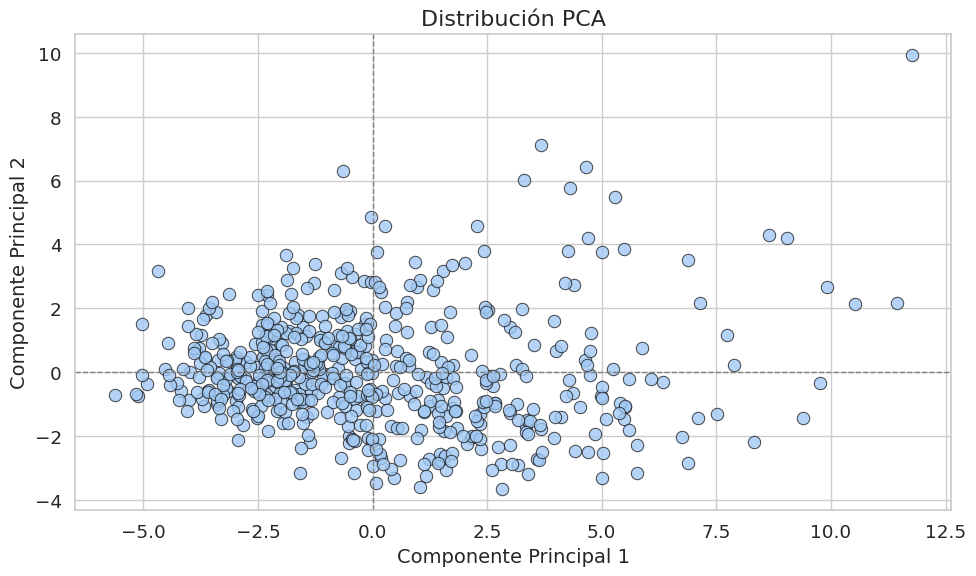

In [ ]:
# Estilo general
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Crear el scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca.iloc[:, 0],
    y=df_pca.iloc[:, 1],
    s=80,               # tamaño de los puntos
    alpha=0.8,
    edgecolor='k'
)

# Títulos y etiquetas
plt.title("Distribución PCA", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=14)
plt.ylabel("Componente Principal 2", fontsize=14)

# Opcional: agregar ejes centrados
plt.axhline(0, color='gray', lw=1, linestyle='--')
plt.axvline(0, color='gray', lw=1, linestyle='--')

plt.tight_layout()
plt.show()


##Aplicación de modelo KMeans

###Método del Codo y Silhouette para determinar el número óptimo de clusters

Se evalúa la calidad del agrupamiento aplicando el algoritmo KMeans sobre los datos transformados mediante PCA. Para determinar el número óptimo de clusters (k), se consideran tres métricas fundamentales evaluadas en el rango de 2 a 14 clusters:

* Método del Codo (Inercia): Evalúa la suma de las distancias al centroide dentro de cada cluster. Se espera un "codo" en la gráfica donde la disminución de la inercia se vuelve marginal, indicando el número óptimo de clusters.

* Coeficiente de Silueta: Mide qué tan bien están separados los clusters. Valores más altos indican mejores agrupaciones (más compactas y bien separadas).

* Davies-Bouldin Score: Cuantifica la relación entre la dispersión intra-cluster y la separación entre clusters. Valores más bajos indican mejores resultados.

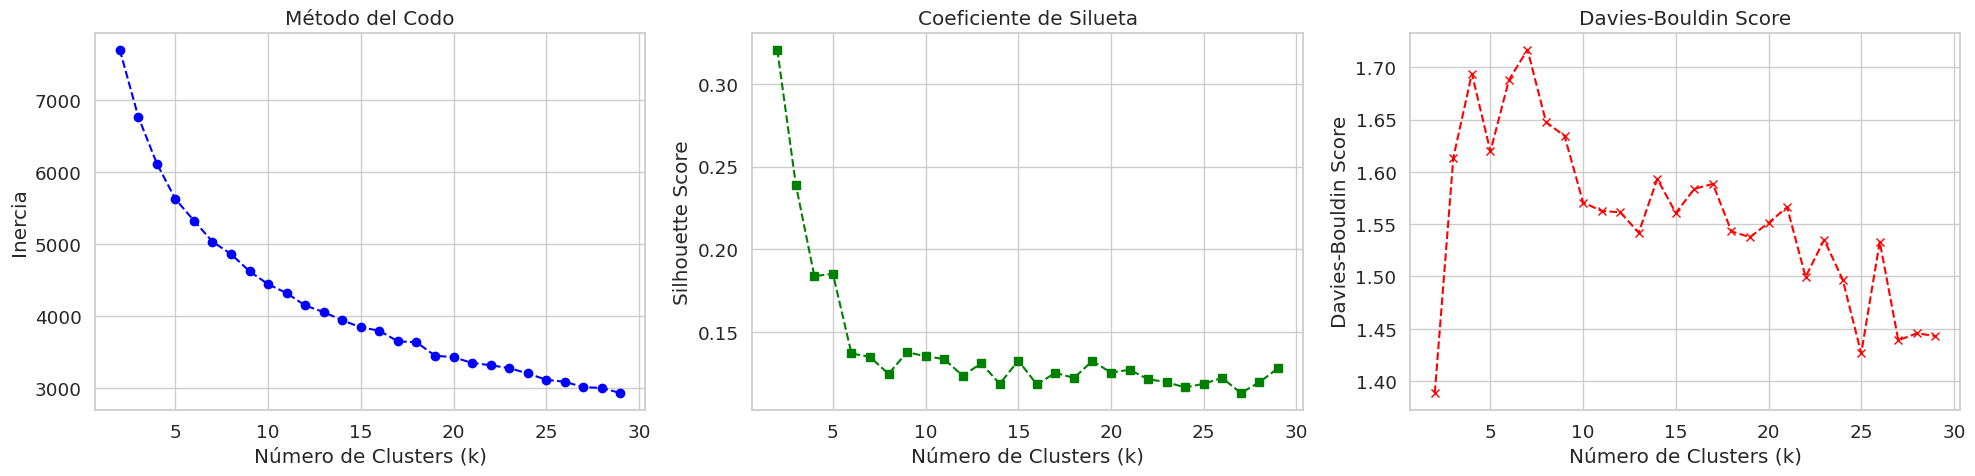

In [ ]:
# Rango de clusters a evaluar
k_range = range(2, 30)

# Listas para guardar métricas
inercia = []
silhouette_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)

    # Guardar métricas
    inercia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))
    db_scores.append(davies_bouldin_score(df_pca, kmeans.labels_))

# Gráfico del método del codo
plt.figure(figsize=(20, 5))

# Gráfico de Inercia (Método del Codo)
plt.subplot(1, 3, 1)
plt.plot(k_range, inercia, marker='o', linestyle='--', color='blue')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)

# Gráfico del Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--', color='green')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silueta')
plt.grid(True)

# Gráfico de Davies-Bouldin Score
plt.subplot(1, 3, 3)
plt.plot(k_range, db_scores, marker='x', linestyle='--', color='red')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score')
plt.grid(True)

plt.tight_layout()
plt.show()

📊 Análisis de Resultados: Selección del Número Óptimo de Clusters

✅ Resultado Óptimo: **2 Clusters**

Tras evaluar el desempeño del algoritmo **KMeans** en un rango de 2 a 30 clusters utilizando tres métricas complementarias, se concluye que **k = 2** es el número óptimo de agrupamientos. Esta elección se justifica con base en los siguientes hallazgos:

1. Método del Codo (Inercia)
- Complejidad en la visualización del codo en el gráfico por lo cual será clave la visualización del coeficiente de silueta y el Davies-Bouldin score.

2. Coeficiente de Silueta
- El **valor más alto del Silhouette Score** se alcanza cuando *k = 2*.
- Esto indica que el cluster 2 presentan mejor agrupación dentro de sus propios clusters y tratan de estar separados de otros grupos.
- La calidad del clustering es buena desde el punto de vista de cohesión y separación.

3. Davies-Bouldin Score
- El **valor más bajo del Davies-Bouldin Score** también se encuentra en *k = 2*.
- Esto sugiere una buena proporción entre la compacidad interna de cada cluster y la distancia entre ellos, lo que refuerza la elección de 2 agrupamientos.

---

🧠 Conclusión

El análisis conjunto de las tres métricas proporciona una base sólida para concluir que **k = 2** es el número de clusters que mejor equilibra simplicidad, separación y cohesión en los datos transformados por PCA. Este resultado será útil para:

- Interpretar **segmentos naturales** dentro del conjunto de datos.
- Aplicar **modelos supervisados** posteriores diferenciando los grupos.
- Desarrollar **estrategias diferenciadas** si se trata de análisis de clientes, productos o comportamientos.


###Aplicación de K-Means Clustering (k=2)

Se aplica el algoritmo **K-Means** sobre los datos transformados por PCA (con 11 componentes principales) utilizando `k=2` clústeres. Se obtienen las siguientes métricas de calidad:

- **Silhouette Score**: Evalúa qué tan bien se agrupan los datos dentro de su clúster (valores cercanos a 1 son mejores).
- **Davies-Bouldin Score**: Evalúa la separación entre clústeres (valores más bajos son mejores).

Además, se visualiza gráficamente la asignación de clústeres en el plano de los dos componentes principales, junto con los centroides.

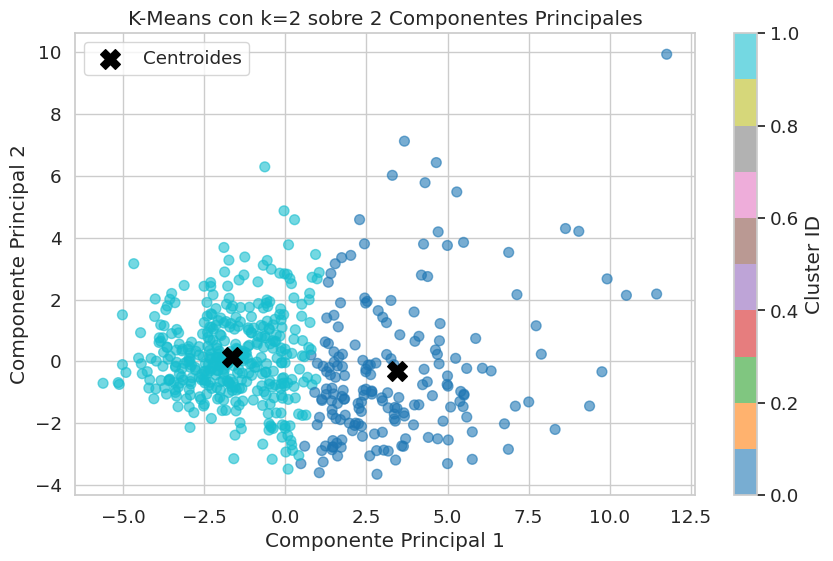


=== INFORMACIÓN KMeans ===
Número de clústeres definidos: 2
Silhouette Score: 0.3206
Davies-Bouldin Score: 1.3885

Coordenadas de los Centroides:
Centroid 0: PC1 = 3.4296, PC2 = -0.3258
Centroid 1: PC1 = -1.6523, PC2 = 0.1570


In [ ]:
# Parámetro del usuario
k = 2  # Número de clústeres

# Aplicar KMeans
kmeans = KMeans(
    n_clusters=k,
    random_state=42
)


labels = kmeans.fit_predict(df_pca)

# Calcular métricas internas
silhouette_avg = silhouette_score(df_pca, labels)
db_score = davies_bouldin_score(df_pca, labels)


# Graficar los clústeres
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='tab10', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'K-Means con k={k} sobre 2 Componentes Principales')
plt.grid(True)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()
plt.show()

# Mostrar métricas
print("\n=== INFORMACIÓN KMeans ===")
print(f"Número de clústeres definidos: {k}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

# Mostrar las coordenadas de los centroides / medias
print("\nCoordenadas de los Centroides:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Centroid {i}: PC1 = {center[0]:.4f}, PC2 = {center[1]:.4f}")

Análisis de Resultados del Modelo KMeans (k=2)

Se evaluó el rendimiento del modelo de clustering KMeans con 2 clústeres sobre los datos transformados con PCA. A continuación, se presentan las métricas clave y su interpretación:

📈 Métricas de Evaluación

**Silhouette Score: 0.3206**

Este valor es relativamente bajo en comparación con lo que se espera para una buena segmentación (un valor cercano a 1 es ideal). La interpretación de este resultado es:
- Los puntos dentro de cada clúster no están perfectamente agrupados, lo que sugiere que la separación entre los clústeres podría no ser lo suficientemente clara.
- La separación entre clústeres es subóptima, lo que podría indicar que el modelo no ha capturado las diferencias esperadas en los datos.
- Se podría considerar ajustar el número de clústeres o probar otros enfoques para mejorar la segmentación.

**Davies-Bouldin Score: 1.3885**

Este valor es relativamente alto, lo que indica que:
- Hay una mayor superposición entre los clústeres, lo que significa que los clústeres no están bien separados.
- Un valor más bajo de Davies-Bouldin sería más favorable, ya que indicaría una mayor separación entre los clústeres y menor dispersión interna.
- Este puntaje sugiere que la elección de k=2 podría no ser ideal y podría ser necesario explorar más valores de k.

🧭 Coordenadas de los Centroides (en el espacio PCA)


| Clúster | **PC1**   | **PC2**   | **Interpretación Básica** |
|---------|-----------|-----------|---------------------------|
| 0      | 3.4296    | -0.3258    | Este clúster tiene una fuerte influencia positiva en PC1, lo que sugiere que los elementos en este grupo están relacionados con las variables que más influyen en este componente. |
| 1       | -1.6523   | 0.1570   | Este clúster tiene valores negativos en PC1 y valores cercanos a cero en PC2, lo que indica que representa un grupo opuesto al clúster 0, con características muy diferentes en términos de las variables transformadas. |

🧠 Conclusiones


- Los resultados sugieren que la elección de **2 clústeres** podría no ser la más adecuada, ya que tanto el **Silhouette Score** como el **Davies-Bouldin Score** indican una segmentación subóptima.
- La **separación entre los clústeres** no es clara, lo que implica que los clústeres pueden no estar lo suficientemente diferenciados en el espacio transformado por PCA.
- Las coordenadas de los centroides muestran que, aunque hay distinción entre los dos grupos, la separación es algo débil, lo que refleja los resultados de las métricas de evaluación.
- Para mejorar la segmentación, se recomienda:
  - Explorar otros métodos de clustering, como DBSCAN o jerárquico, que podrían captar mejor la estructura subyacente en los datos.
  - Realizar una mayor **exploración de los datos** para comprender mejor las relaciones entre las variables.


###Análisis de diagnostico vs clúster

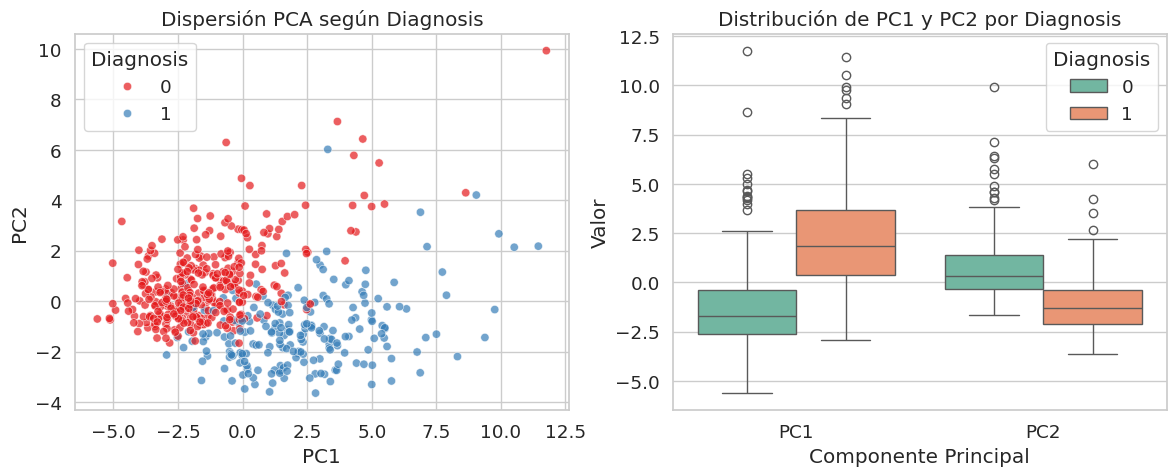

In [ ]:
df_pca['diagnosis'] = df['diagnosis']

# Graficar
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PC1', y='PC2',
    hue='diagnosis',
    data=df_pca,
    palette='Set1',
    alpha=0.7
)
plt.title('Dispersión PCA según Diagnosis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Diagnosis')
plt.grid(True)

# Subplot 2: Boxplots para PC1 y PC2
plt.subplot(1, 2, 2)
df_pca_melted = df_pca.melt(id_vars='diagnosis', value_vars=['PC1', 'PC2'],
                            var_name='Componente', value_name='Valor')

sns.boxplot(
    x='Componente', y='Valor',
    hue='diagnosis',
    data=df_pca_melted,
    palette='Set2'
)
plt.title('Distribución de PC1 y PC2 por Diagnosis')
plt.xlabel('Componente Principal')
plt.ylabel('Valor')
plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


Exactitud (Accuracy):  0.8330
Precisión (Precision): 0.8162
Sensibilidad (Recall): 0.7123


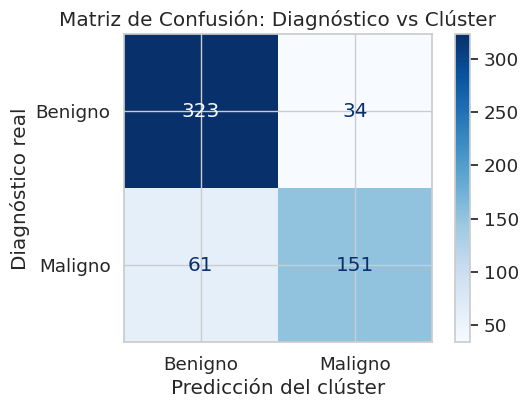

In [ ]:
df_pca['Cluster']=1 - labels # Invertir orden para que el cluster 1 se relacione con diagnostico 1 y viceversa
df_validador_matriz_confusion=df_pca[['diagnosis','Cluster']].value_counts().reset_index(name='count')

# Expandir el DataFrame
y_true = []
y_pred = []

for _, row in df_validador_matriz_confusion.iterrows():
    y_true.extend([row['diagnosis']] * row['count'])
    y_pred.extend([row['Cluster']] * row['count'])

# Métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Exactitud (Accuracy):  {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
etiquetas = ['Benigno', 'Maligno']

# Gráfico con títulos personalizados
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot(cmap='Blues', values_format='d', ax=ax)
ax.set_title("Matriz de Confusión: Diagnóstico vs Clúster")
ax.set_xlabel("Predicción del clúster")
ax.set_ylabel("Diagnóstico real")
plt.show()


🔍 Evaluación de Clustering vs. Diagnóstico – Análisis de Métricas

📊 Métricas obtenidas comparando la clusterización vs el diagnostico

- **Exactitud (Accuracy):** `0.8330`  
  ✅ El 83.3% de las observaciones fueron correctamente agrupadas según el diagnóstico real.

- **Precisión (Precision):** `0.8162`  
  🎯 De los casos que el clúster clasificó como malignos (cluster = 1), el 81% correspondían realmente a diagnósticos malignos (diagnosis = 1).

- **Sensibilidad (Recall):** `0.7123`  
  ⚠️ El modelo identificó correctamente el 71.23% de los casos positivos. Algunos casos positivos están siendo clasificados erróneamente (falsos negativos).

---

📉 Indicadores internos del modelo de clustering

A pesar de obtener buenos resultados en métricas comparativas con el diagnóstico, los **indicadores internos** como el **índice de silueta** o **índice de Davies-Bouldin** fueron **bajos**, lo que en teoría sugiere una **baja cohesión y separación entre clústeres**.

---

🤖 Interpretación

- El modelo de clustering **logra capturar patrones útiles** que reflejan el diagnóstico, a pesar de que los grupos formados no estén claramente separados desde una perspectiva geométrica.
- El diagnóstico podría estar **implícito en combinaciones sutiles de características**, más allá de la distancia o forma de los clústeres.
- El hecho de que el número de clústeres coincida con el número de clases reales (0 y 1) puede haber facilitado un buen alineamiento.

---

📌 Conclusión

El modelo de clustering, aunque débil en estructura geométrica según métricas internas, demuestra ser **valioso para distinguir clases reales**, lo que lo convierte en una herramienta útil como **clasificador no supervisado**.


#Análisis de diagnostico a través de modelos supervisados

Para este análisis se retoma el dataset df_scaled, el cual ya ha sido procesado mediante la eliminación de variables altamente correlacionadas y la estandarización de sus características. Donde no se han aplicado técnicas como PCA ni KMeans. En esta etapa, se busca aplicar métodos supervisados de selección de características, incluyendo RFE, SelectKBest y Lasso. Posteriormente, se evaluará el desempeño de distintos modelos supervisados con base en métricas de rendimiento para identificar el más adecuado.

##**Selección de Variables**


División del conjunto de datos

1️⃣ Separación de variables predictoras y objetivo

Se separa la variable objetivo (diagnosis) del resto de variables predictoras, creando X e y para su uso en el modelo.

2️⃣ División en entrenamiento y prueba

Se divide el conjunto de datos en un 70% para entrenamiento y un 30% para prueba usando train_test_split.

Esta separación permite evaluar el rendimiento del modelo sobre datos no vistos y prevenir el sobreajuste.

Se fija una semilla aleatoria para garantizar la reproducibilidad.

In [ ]:
# -----------------------
# División de datos para entrenamiento y prueba
# -----------------------

# 1️⃣ Separar variables predictoras y variable objetivo:
# Se separa el conjunto de datos en X (variables independientes) e y (variable dependiente o de salida).
X = df_scaled.drop('diagnosis', axis=1)
y = df_scaled['diagnosis']

# 2️⃣ Dividir los datos en conjuntos de entrenamiento y prueba:
# Se utiliza train_test_split para dividir los datos en 70% entrenamiento y 30% prueba.
# El parámetro random_state garantiza que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


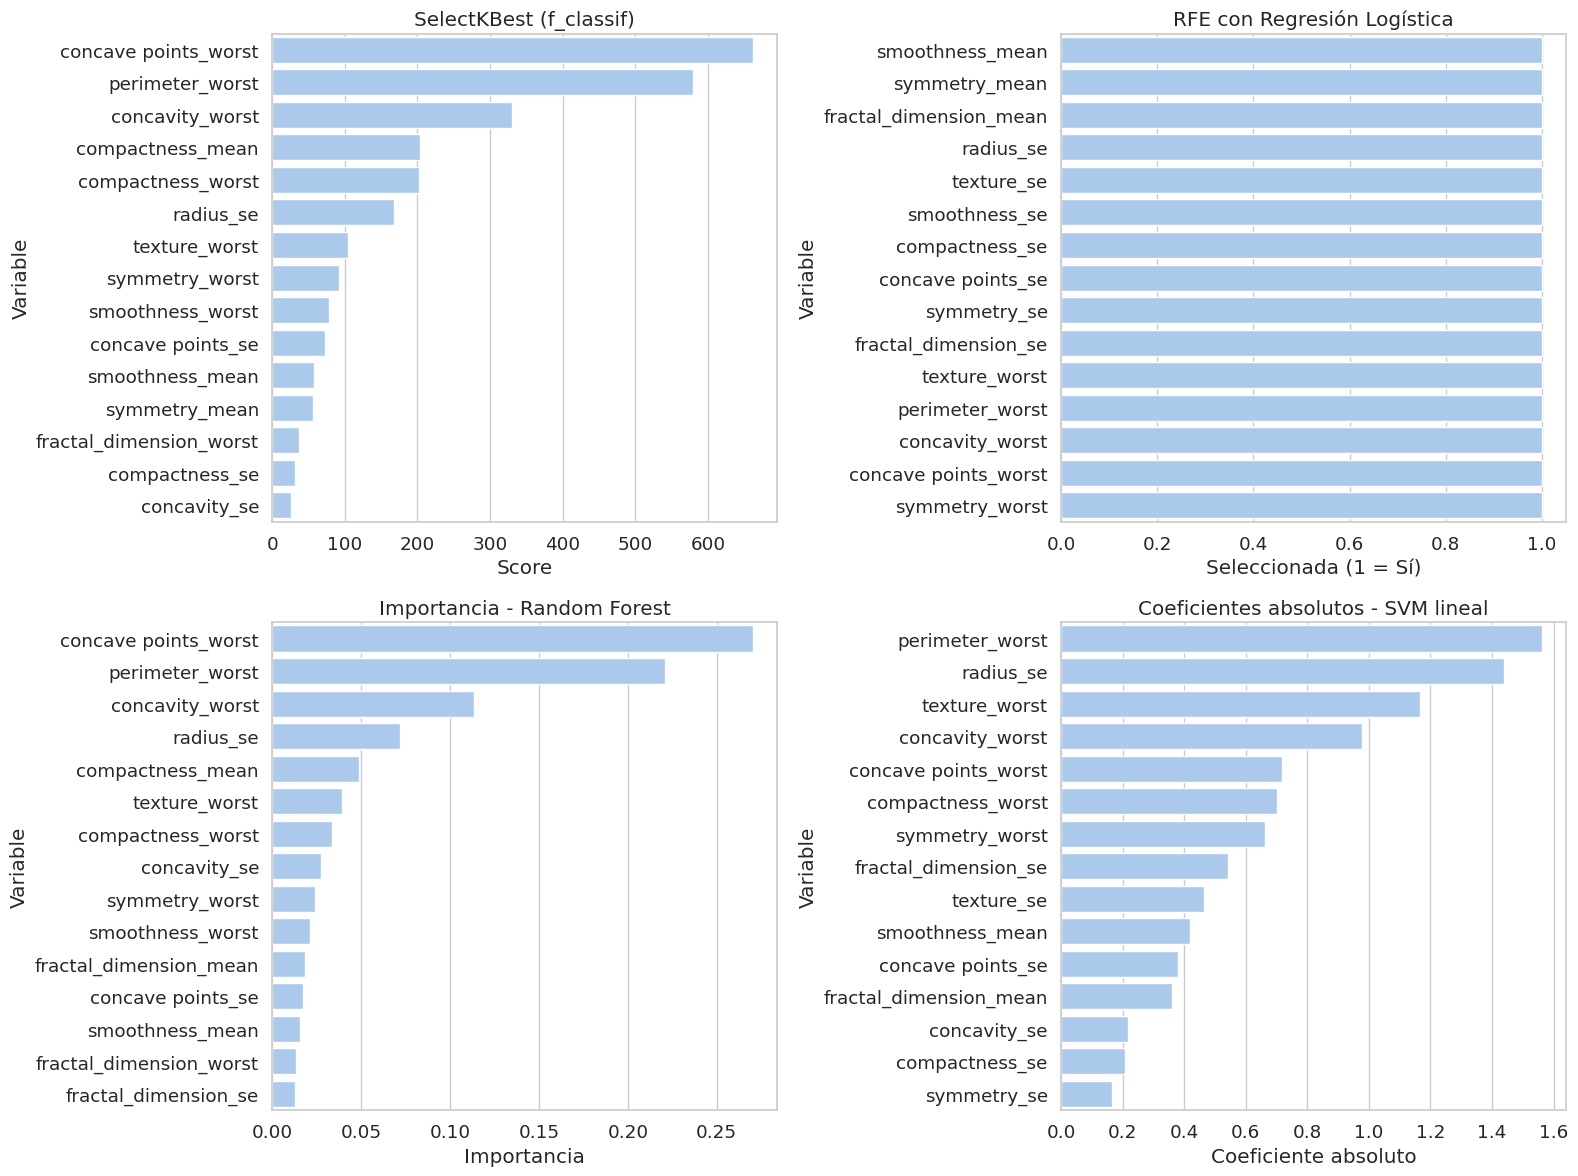

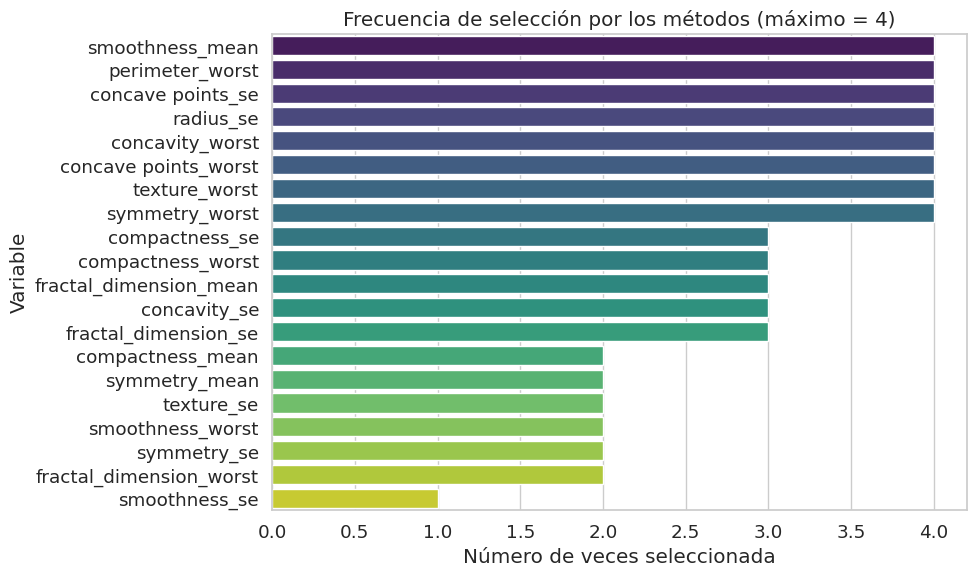

,Frecuencia de selección
smoothness_mean,4
perimeter_worst,4
concave points_se,4
radius_se,4
concavity_worst,4
concave points_worst,4
texture_worst,4
symmetry_worst,4
compactness_se,3
compactness_worst,3


In [ ]:
# Parámetros ajustables
random_state = 42
top_k = 15  # Número de variables a seleccionar por método

# 1. SelectKBest con f_classif
skb = SelectKBest(score_func=f_classif, k='all')
skb.fit(X_train, y_train)
skb_scores = pd.Series(skb.scores_, index=X.columns)

# 2. RFE con regresión logística
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=top_k)
rfe.fit(X_train, y_train)
rfe_support = pd.Series(rfe.support_, index=X.columns)

# 3. Random Forest
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)

# 4. SVM con coeficiente lineal
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
svc_coef = pd.Series(np.abs(svc.coef_[0]), index=X.columns)

# Contar cuántas veces fue seleccionada cada variable
selected_counts = (
    (skb_scores.rank(ascending=False) <= top_k).astype(int) +
    rfe_support.astype(int) +
    (rf_importances.rank(ascending=False) <= top_k).astype(int) +
    (svc_coef.rank(ascending=False) <= top_k).astype(int)
)
selected_counts_sorted = selected_counts.sort_values(ascending=False)

# Gráficas individuales en subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x=skb_scores.sort_values(ascending=False).head(top_k),
            y=skb_scores.sort_values(ascending=False).head(top_k).index, ax=axes[0, 0])
axes[0, 0].set_title("SelectKBest (f_classif)")
axes[0, 0].set_xlabel("Score")
axes[0, 0].set_ylabel("Variable")

sns.barplot(x=np.ones(top_k),
            y=rfe_support[rfe_support].index[:top_k], ax=axes[0, 1])
axes[0, 1].set_title("RFE con Regresión Logística")
axes[0, 1].set_xlabel("Seleccionada (1 = Sí)")
axes[0, 1].set_ylabel("Variable")

sns.barplot(x=rf_importances.sort_values(ascending=False).head(top_k),
            y=rf_importances.sort_values(ascending=False).head(top_k).index, ax=axes[1, 0])
axes[1, 0].set_title("Importancia - Random Forest")
axes[1, 0].set_xlabel("Importancia")
axes[1, 0].set_ylabel("Variable")

sns.barplot(x=svc_coef.sort_values(ascending=False).head(top_k),
            y=svc_coef.sort_values(ascending=False).head(top_k).index, ax=axes[1, 1])
axes[1, 1].set_title("Coeficientes absolutos - SVM lineal")
axes[1, 1].set_xlabel("Coeficiente absoluto")
axes[1, 1].set_ylabel("Variable")

plt.tight_layout()
plt.show()

# Gráfica resumen
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_counts_sorted.values, y=selected_counts_sorted.index, palette="viridis")
plt.title("Frecuencia de selección por los métodos (máximo = 4)")
plt.xlabel("Número de veces seleccionada")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
selected_counts_sorted.head(top_k).to_frame(name='Frecuencia de selección')


📊 Análisis de Selección de Características

A partir de la aplicación de cuatro métodos distintos de selección de características (`SelectKBest`, `RFE`, `Random Forest`, y `SVM lineal`), se obtuvo una tabla de frecuencia que indica cuántos métodos coincidieron en considerar cada variable como importante.

---

✅ Variables Seleccionadas por los 4 Métodos (Frecuencia = 4)

Estas variables fueron consideradas relevantes por **todos los métodos**, lo que indica una **alta robustez e importancia** para la construcción del modelo:

| Variable                 | Frecuencia |
|--------------------------|------------|
| smoothness_mean          | 4          |
| perimeter_worst          | 4          |
| concave points_se        | 4          |
| radius_se                | 4          |
| concavity_worst          | 4          |
| concave points_worst     | 4          |
| texture_worst            | 4          |
| symmetry_worst           | 4          |

**Total: 8 variables**

Estas características pueden considerarse como la **base para un modelo eficiente y generalizable**.

---

🟡 Variables con Frecuencia 3

Estas variables fueron seleccionadas por **tres de los cuatro métodos**. Aunque no fueron completamente consistentes, **pueden aportar valor adicional** en algunos modelos:

| Variable                   | Frecuencia |
|----------------------------|------------|
| compactness_se             | 3          |
| compactness_worst          | 3          |
| fractal_dimension_mean     | 3          |
| concavity_se               | 3          |
| fractal_dimension_se       | 3          |

💡 Se recomienda considerar estas variables si se desea **explorar modelos con mayor complejidad o robustez**.

---

🔵 Variables con Frecuencia 2

Estas variables fueron **menos consistentes** entre los métodos de selección:

| Variable                 | Frecuencia |
|--------------------------|------------|
| compactness_mean         | 2          |
| symmetry_mean            | 2          |

⚠️ Estas variables pueden tener **menor relevancia explicativa**. Se sugiere **excluirlas en una primera versión** del modelo y evaluarlas más adelante si es necesario.

---

🧩 Conclusión

- Para una **primera iteración del modelo**, se recomienda usar **solo las 8 variables con frecuencia 4**.
- En una **segunda iteración**, se pueden agregar las 5 variables con frecuencia 3 para evaluar si el desempeño del modelo mejora.
- Las variables con menor frecuencia pueden ser reservadas para análisis más avanzados o pruebas de sensibilidad.


##Aplicación de Modelos de Clasificación

In [ ]:
warnings.filterwarnings("ignore")
# ------------------------------
# Configuración de parámetros
# ------------------------------
random_seed = 42

# Variables seleccionadas

selected_features = ['smoothness_mean', 'perimeter_worst', 'concave points_se', 'radius_se', 'concavity_worst', 'concave points_worst', 'texture_worst', 'symmetry_worst',
                     'compactness_se','compactness_worst','fractal_dimension_mean','concavity_se','fractal_dimension_se']


# ------------------------------
# Definición de modelos y grillas
# ------------------------------
model_grids = {
    "LogisticRegression": (
        LogisticRegression(solver="liblinear"),
        {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]}
    ),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=random_seed),
        {"max_depth": [None,3, 5, 7, 10], "min_samples_split": [None,2, 5, 10], "min_samples_leaf": [None,1, 2, 4]}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=random_seed),
        {"n_estimators": [None,100], "max_depth": [None,5, 10, 15], "min_samples_split": [None,2, 5], "min_samples_leaf": [None,1, 2]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=random_seed),
        {"n_estimators": [None,100], "learning_rate": [None,0.05, 0.1], "max_depth": [None,3, 5, 7]}
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_seed),
        {"n_estimators": [None,100], "learning_rate": [None,0.05, 0.1], "max_depth": [None,3, 5], "subsample": [None,0.8, 1.0], "colsample_bytree": [None,0.8, 1.0]}
    ),
    "SVM": (
        SVC(probability=True, random_state=random_seed),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    ),
    "SGD_Logistic": (
    SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=random_seed),
    {
        "alpha": [1e-4, 1e-3, 1e-2],               # Regularización (equivale a 1/C)
        "l1_ratio": [0, 0.5, 1],                   # ElasticNet: 0=L2, 1=L1
        "max_iter": [1000, 2000],
        "learning_rate": ["optimal", "invscaling", "constant"],
        "eta0": [0.01, 0.1, 1]                     # Tasa inicial de aprendizaje
    }
    )
}

# ------------------------------
# Evaluación de modelos
# ------------------------------
results = []

for model_name, (model, param_grid) in model_grids.items():
    print(f"🔍 Entrenando modelo: {model_name}")
    grid = GridSearchCV(model, param_grid, scoring='f1', cv=20, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Predicciones en entrenamiento
    y_train_pred = best_model.predict(X_train)
    y_train_proba = best_model.predict_proba(X_train)[:, 1]

    # Predicciones en test
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Métricas
    metrics = {
        "Modelo": model_name,
        "Mejores Parámetros": grid.best_params_,
        "Train_Accuracy": accuracy_score(y_train, y_train_pred),
        "Train_Precision": precision_score(y_train, y_train_pred),
        "Train_Recall": recall_score(y_train, y_train_pred),
        "Train_F1": f1_score(y_train, y_train_pred),
        "Train_ROC_AUC": roc_auc_score(y_train, y_train_proba),
        "Test_Accuracy": accuracy_score(y_test, y_test_pred),
        "Test_Precision": precision_score(y_test, y_test_pred),
        "Test_Recall": recall_score(y_test, y_test_pred),
        "Test_F1": f1_score(y_test, y_test_pred),
        "Test_ROC_AUC": roc_auc_score(y_test, y_test_proba)
    }

    results.append(metrics)

# Consolidar métricas
df_metrics_final = pd.DataFrame(results)
df_metrics_final_sorted = df_metrics_final.sort_values(by="Test_F1", ascending=False)
df_metrics_final_sorted[['Modelo', 'Mejores Parámetros', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_ROC_AUC']]



🔍 Entrenando modelo: LogisticRegression
🔍 Entrenando modelo: DecisionTree
🔍 Entrenando modelo: RandomForest
🔍 Entrenando modelo: GradientBoosting
🔍 Entrenando modelo: XGBoost
🔍 Entrenando modelo: SVM
🔍 Entrenando modelo: SGD_Logistic


,Modelo,Mejores Parámetros,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
0,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.982456,0.983871,0.968254,0.976000,0.996620
6,SGD_Logistic,"{'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0, 'l...",0.982456,0.983871,0.968254,0.976000,0.997354
5,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.970760,0.983333,0.936508,0.959350,0.995444
4,XGBoost,"{'colsample_bytree': 0.8, 'learning_rate': Non...",0.947368,0.935484,0.920635,0.928000,0.994415
2,RandomForest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.941520,0.934426,0.904762,0.919355,0.992210
3,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.941520,0.934426,0.904762,0.919355,0.992357
1,DecisionTree,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.918129,0.855072,0.936508,0.893939,0.930996


##Visualizar detalle de mejores parámetros

In [ ]:
pd.set_option('display.max_colwidth', None)
print(df_metrics_final_sorted[['Modelo', 'Mejores Parámetros']])

               Modelo  \
0  LogisticRegression   
6        SGD_Logistic   
5                 SVM   
4             XGBoost   
2        RandomForest   
3    GradientBoosting   
1        DecisionTree   

                                                                                             Mejores Parámetros  
0                                                                                     {'C': 1, 'penalty': 'l2'}  
6                  {'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0, 'learning_rate': 'invscaling', 'max_iter': 1000}  
5                                                              {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  
4  {'colsample_bytree': 0.8, 'learning_rate': None, 'max_depth': None, 'n_estimators': None, 'subsample': None}  
2                       {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  
3                                                   {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}  
1

# Análisis de Modelos para el Dataset de Cáncer de Mama (Breast Cancer Wisconsin)

En este análisis, evaluamos siete modelos de clasificación para predecir la presencia de cáncer en el **Breast Cancer Wisconsin (Diagnostic) Data Set**. Los modelos evaluados son: **XGBoost**, **Random Forest**, **Gradient Boosting**, **Logistic Regression**, **SGD Logistic Regression**, **SVM**, y **Decision Tree**. Se compararon con base en métricas clave como precisión, recall, F1-score y AUC ROC, tanto en los conjuntos de entrenamiento como de prueba.

## Análisis General

Los resultados muestran que todos los modelos tienen un rendimiento elevado en el conjunto de entrenamiento. Sin embargo, existen diferencias más marcadas en el desempeño sobre el conjunto de prueba, lo que revela signos de **sobreajuste en algunos modelos complejos** (como XGBoost y Random Forest), mientras que los modelos lineales generalizan mejor.

A continuación, se presenta un resumen de los modelos ordenados de **mejor a peor rendimiento general** considerando el equilibrio entre precisión, recall, F1 y AUC ROC en el conjunto de prueba.

---

## 1. **SGD Logistic Regression**
- **Mejores parámetros**: `{'alpha': 0.0001, 'eta0': 1, 'l1_ratio': 0, ...}`
- **Train F1**: 0.9761
- **Test F1**: 0.9760
- **AUC ROC (Test)**: 0.9974
- **Análisis**:  
  El modelo basado en descenso de gradiente estocástico muestra un rendimiento muy sólido y balanceado, con un excelente **F1 score y AUC ROC en el conjunto de prueba**, sin signos de sobreajuste. Es una excelente opción cuando se desea eficiencia y buena generalización.

---

## 2. **Logistic Regression**
- **Mejores parámetros**: `{'C': 1, 'penalty': 'l2'}`
- **Train F1**: 0.9761
- **Test F1**: 0.9760
- **AUC ROC (Test)**: 0.9966
- **Análisis**:  
  Modelo simple y robusto. Su desempeño en entrenamiento y prueba es prácticamente idéntico. Ligera desventaja frente a SGD en AUC, pero es más fácil de interpretar. Una opción ideal cuando se busca **transparencia y generalización**.

---

## 3. **SVM (Máquinas de Vectores de Soporte)**
- **Mejores parámetros**: `{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}`
- **Train F1**: 0.9655
- **Test F1**: 0.9594
- **AUC ROC (Test)**: 0.9954
- **Análisis**:  
  SVM muestra un buen balance general, aunque con una leve caída en recall respecto a modelos logísticos. Ideal para escenarios donde se desea un clasificador más robusto a outliers y se puede tolerar un poco menos de interpretabilidad.

---

## 4. **XGBoost**
- **Mejores parámetros**: `{'colsample_bytree': 0.8, 'learning_rate': None, ...}`
- **Train F1**: 1.0
- **Test F1**: 0.9280
- **AUC ROC (Test)**: 0.9944
- **Análisis**:  
  Este modelo logra **un ajuste perfecto en entrenamiento**, pero muestra una **caída notable** en el conjunto de prueba, lo que indica un sobreajuste. Aunque su AUC sigue siendo alto, la pérdida de F1 en prueba disminuye su confiabilidad.

---

## 5. **Gradient Boosting**
- **Mejores parámetros**: `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}`
- **Train F1**: 1.0
- **Test F1**: 0.9194
- **AUC ROC (Test)**: 0.9924
- **Análisis**:  
  Similar a XGBoost, tiene un rendimiento perfecto en entrenamiento, pero sufre una pérdida en prueba. Aunque sigue siendo un modelo muy fuerte, el riesgo de sobreajuste es evidente.

---

## 6. **Random Forest**
- **Mejores parámetros**: `{'max_depth': None, 'min_samples_leaf': 1, ...}`
- **Train F1**: 1.0
- **Test F1**: 0.9194
- **AUC ROC (Test)**: 0.9922
- **Análisis**:  
  Al igual que los modelos de boosting, Random Forest muestra signos claros de sobreajuste. Es potente, pero pierde rendimiento en generalización.

---

## 7. **Decision Tree**
- **Mejores parámetros**: `{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}`
- **Train F1**: 0.9800
- **Test F1**: 0.8939
- **AUC ROC (Test)**: 0.9310
- **Análisis**:  
  El modelo más simple basado en árboles. Aunque fácil de interpretar, sufre la mayor caída en desempeño en prueba. Es el modelo **menos recomendable** en este caso por su bajo poder predictivo.

---

## Conclusión General

- **SGD Logistic Regression** y **Logistic Regression** son los modelos con mejor capacidad de generalización.
- **Modelos complejos** como XGBoost, Gradient Boosting y Random Forest tienen un rendimiento sobresaliente en entrenamiento, pero tienden a sobreajustar.
- **Decision Tree** es útil por su simplicidad, pero no ofrece un rendimiento competitivo.
- **SVM** es una alternativa sólida y robusta.

**Recomendación**:
- Para tareas críticas que requieren máxima precisión y confiabilidad, se recomienda **SGD Logistic Regression**.
- Si se prioriza la interpretabilidad, **Logistic Regression** es la mejor opción.
